In [64]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostrar código."></form>''')

BOLETIM EPIDEMIOLóGICO DA MICRORREGIÃO DE OURO PRETO.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#importamos o banco de dado
base_out = pd.read_excel('xlsx_sistemas(1).xlsx',sep=';', encoding='latin-1')
base_out['contador'] = 1

base_out

,URS,MICRO,MACRO,ID,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA,CODIGO,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,RACA,DATA_ATUALIZACAO,ORIGEM_DA_INFORMACAO,contador
0,JUIZ DE FORA,JUIZ DE FORA,SUDESTE,1,2020-06-24,CASO CONFIRMADO,FEMININO,79.0,70 A 79 ANOS,JUIZ DE FORA,313670.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,BOLETIM,1
1,JUIZ DE FORA,JUIZ DE FORA,SUDESTE,2,2020-06-24,CASO CONFIRMADO,MASCULINO,56.0,50 A 59 ANOS,JUIZ DE FORA,313670.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,BOLETIM,1
2,JUIZ DE FORA,SANTOS DUMONT,SUDESTE,3,2020-06-24,CASO CONFIRMADO,MASCULINO,72.0,70 A 79 ANOS,SANTOS DUMONT,316070.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,BOLETIM,1
3,JUIZ DE FORA,JUIZ DE FORA,SUDESTE,4,2020-06-24,CASO CONFIRMADO,FEMININO,0.0,<1ANO,JUIZ DE FORA,313670.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO,NAO,NAO INFORMADO,2020-08-07,BOLETIM,1
4,PATOS DE MINAS,PATOS DE MINAS,NOROESTE,5,2020-06-23,CASO CONFIRMADO,MASCULINO,60.0,60 A 69 ANOS,VAZANTE,317100.0,NAO,RECUPERADO,NAO,NAO,BRANCA,2020-08-07,BOLETIM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44776,DIVINOPOLIS,ITAUNA,OESTE,44777,2020-08-05,CASO CONFIRMADO,FEMININO,25.0,20 A 29 ANOS,ITAUNA,313380.0,NAO INFORMADO,RECUPERADO,NAO,NAO,BRANCA,2020-08-07,ESUS,1
44777,GOVERNADOR VALADARES,GOVERNADOR VALADARES,LESTE,44778,2020-08-03,CASO CONFIRMADO,FEMININO,37.0,30 A 39 ANOS,GOVERNADOR VALADARES,312770.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO,NAO,PARDA,2020-08-07,ESUS,1
44778,POUSO ALEGRE,POUSO ALEGRE,SUL,44779,2020-08-05,CASO CONFIRMADO,FEMININO,11.0,10 A 19 ANOS,BUENO BRANDAO,310910.0,NAO INFORMADO,NAO INFORMADO,NAO,NAO,BRANCA,2020-08-07,ESUS,1
44779,UBA,UBA,SUDESTE,44780,2020-07-24,CASO CONFIRMADO,MASCULINO,20.0,20 A 29 ANOS,GUIRICEMA,312900.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO,NAO,BRANCA,2020-08-07,ESUS,1


In [2]:
#segundo banco de dado com o restante dos confirmados.
base_lab = pd.read_excel('xlsx_laboratorios(1).xlsx',sep=',', encoding='latin-1')
base_lab['contador'] = 1

base_lab
base = pd.concat([base_lab, base_out], ignore_index=False)

#Limpeza e oredanção dos dados
from datetime import datetime
base['DATA_NOTIFICACAO'] = pd.to_datetime(base['DATA_NOTIFICACAO'], format='%m/%d/%Y')

base.sort_values('DATA_NOTIFICACAO', inplace=True)

In [3]:
#seleciono a regiao com a qual vou trabalhar e extrair os dados.
Microregiao_OP = base.loc[base['MICRO'] == 'OURO PRETO']

In [4]:
Microregiao_OP

,URS,MICRO,MACRO,ID,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA,CODIGO,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,RACA,DATA_ATUALIZACAO,ORIGEM_DA_INFORMACAO,contador
10596,BELO HORIZONTE,OURO PRETO,CENTRO,55378,2020-03-07,CASO CONFIRMADO,MASCULINO,NaN,NaN,MARIANA,314000.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,LABORATORIOS PUBLICOS E PRIVADOS,1
10592,BELO HORIZONTE,OURO PRETO,CENTRO,55374,2020-03-07,CASO CONFIRMADO,MASCULINO,NaN,NaN,ITABIRITO,313190.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,LABORATORIOS PUBLICOS E PRIVADOS,1
10585,BELO HORIZONTE,OURO PRETO,CENTRO,55367,2020-03-07,CASO CONFIRMADO,MASCULINO,NaN,NaN,MARIANA,314000.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,LABORATORIOS PUBLICOS E PRIVADOS,1
10570,BELO HORIZONTE,OURO PRETO,CENTRO,55352,2020-03-07,CASO CONFIRMADO,MASCULINO,NaN,NaN,OURO PRETO,314610.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,LABORATORIOS PUBLICOS E PRIVADOS,1
12776,BELO HORIZONTE,OURO PRETO,CENTRO,12777,2020-03-20,CASO CONFIRMADO,FEMININO,40.0,40 A 49 ANOS,MARIANA,314000.0,NAO INFORMADO,RECUPERADO,NAO,NAO,PARDA,2020-08-07,BOLETIM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40219,BELO HORIZONTE,OURO PRETO,CENTRO,85001,2020-08-04,CASO CONFIRMADO,FEMININO,30.0,30 A 39 ANOS,ITABIRITO,313190.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,LABORATORIOS PUBLICOS E PRIVADOS,1
40252,BELO HORIZONTE,OURO PRETO,CENTRO,85034,2020-08-04,CASO CONFIRMADO,MASCULINO,69.0,60 A 69 ANOS,ITABIRITO,313190.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,LABORATORIOS PUBLICOS E PRIVADOS,1
40919,BELO HORIZONTE,OURO PRETO,CENTRO,85701,2020-08-05,CASO CONFIRMADO,FEMININO,26.0,20 A 29 ANOS,MARIANA,314000.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,LABORATORIOS PUBLICOS E PRIVADOS,1
40913,BELO HORIZONTE,OURO PRETO,CENTRO,85695,2020-08-05,CASO CONFIRMADO,FEMININO,35.0,30 A 39 ANOS,MARIANA,314000.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-07,LABORATORIOS PUBLICOS E PRIVADOS,1


In [8]:
pd.DataFrame(Microregiao_OP['EVOLUCAO'].value_counts()).reset_index()
#a = a.sort_values(by=['index'], inplace=True)
#Microregiao_OP.groupby('DATA_NOTIFICACAO').contador.sum()

,index,EVOLUCAO
0,EM ACOMPANHAMENTO,1092
1,RECUPERADO,621


In [9]:
confirmados_24h = Microregiao_OP.loc[Microregiao_OP['DATA_NOTIFICACAO'] == '2020-08-6']
print("Confirmados nas ultimas 24hrs: ",int(confirmados_24h.contador.sum()))

Confirmados nas ultimas 24hrs:  0


In [10]:
Casos_confirmados = Microregiao_OP.contador.sum()
print('Casos confirmados: ', int(Casos_confirmados))

Casos confirmados:  1713


In [11]:
em_acompanhamento = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'EM ACOMPANHAMENTO']
em_acompanhamento = em_acompanhamento['contador'].sum()
print('Casos em acompanhamento: ', 'Não Informado')

Casos em acompanhamento:  Não Informado


In [12]:
recuperados = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'RECUPERADO']
Casos_recuperados = recuperados['contador'].sum()
print('Casos recuperados: ', int(Casos_recuperados))

Casos recuperados:  621


In [13]:
obitos = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos['contador'].sum()
print('Óbitos: ', int(obitos_OP))

Óbitos:  0


In [14]:
print('')

1_ PERFIL EPIDEMIOLOGICO DOS CONFIRMADOS:

POR SEXO:

In [15]:
#Microregiao_OP.groupby(['SEXO']).contador.sum()

In [16]:
Homens_confirmados = Microregiao_OP.loc[(Microregiao_OP['SEXO'] == 'MASCULINO')]
Homens_confirmados_vivos = Homens_confirmados[(Homens_confirmados.EVOLUCAO != 'OBITO')]
Homens_confirmados_vivos = Homens_confirmados_vivos['contador'].sum()
print('Homens confirmados: ', int(Homens_confirmados_vivos))

Homens confirmados:  1195


In [17]:
Mulheres_confirmadas = Microregiao_OP.loc[(Microregiao_OP['SEXO'] == 'FEMININO')]
Mulheres_confirmadas_vivas = Mulheres_confirmadas[(Mulheres_confirmadas.EVOLUCAO != 'OBITO')]
Mulheres_confirmadas_vivas = Mulheres_confirmadas_vivas['contador'].sum()
print('Mulheres confirmadas: ', int(Mulheres_confirmadas_vivas))

Mulheres confirmadas:  499


In [18]:
sem_informacao_sexo = Microregiao_OP.loc[Microregiao_OP['SEXO'] == 'NAO INFORMADO']
print('Sem informação do sexo: ', int(sem_informacao_sexo.contador.sum()))

Sem informação do sexo:  19


In [19]:
perct_por_sexo_H_vivos = Homens_confirmados_vivos/(Homens_confirmados_vivos+Mulheres_confirmadas_vivas)
print("Porcentagem homens: ","{:.0%}".format(perct_por_sexo_H_vivos));

Porcentagem homens:  71%


In [20]:
perct_por_sexo_M_vivos = Mulheres_confirmadas_vivas/(Homens_confirmados_vivos+Mulheres_confirmadas_vivas)
print("Porcentagem mulheres: ","{:.0%}".format(perct_por_sexo_M_vivos));

Porcentagem mulheres:  29%


In [21]:
N_vivo = Mulheres_confirmadas_vivas + Homens_confirmados_vivos
print("N total: ",int(N_vivo))

N total:  1694


In [22]:
print('')

COMORBIDADE:

In [23]:
com_comorbidade = Microregiao_OP.loc[(Microregiao_OP['COMORBIDADE'] == 'SIM')]
Com_comorbidade_vivos = com_comorbidade[(com_comorbidade.EVOLUCAO != 'OBITO')]
Com_comorbidade_vivos = Com_comorbidade_vivos['contador'].sum()
print("Com comorbidade: ", int(Com_comorbidade_vivos))

Com comorbidade:  36


In [24]:
sem_comorbidade = Microregiao_OP.loc[(Microregiao_OP['COMORBIDADE'] == 'NAO')]
Sem_comorbidade_vivos = sem_comorbidade[(sem_comorbidade.EVOLUCAO != 'OBITO')]
Sem_comorbidade_vivos = Sem_comorbidade_vivos['contador'].sum() 
print ("Sem comorbidade: ", int(Sem_comorbidade_vivos))

Sem comorbidade:  19


In [25]:
comorbidade_nao_informada = Microregiao_OP.loc[(Microregiao_OP['COMORBIDADE'] == 'NAO INFORMADO')]
Comorbidade_nao_informada = comorbidade_nao_informada['contador'].sum()
print("Comorbidade não informada: ", int(Comorbidade_nao_informada))

Comorbidade não informada:  1658


In [26]:
print('')

In [27]:
Media_idade_confirmados = Microregiao_OP.loc[(Microregiao_OP.EVOLUCAO != 'OBITO')]
Media_idade_confirmados = Media_idade_confirmados['IDADE'].mean()
print ("Média de idade entre os vivos: ", round(Media_idade_confirmados))
populacao_total = 51875+60724+74281
print("Prevalência Micro Ouro Preto:", "{:.0}".format(Casos_confirmados/populacao_total))

Média de idade entre os vivos:  41
Prevalência Micro Ouro Preto: 0.009


In [28]:
print('')

In [29]:
Microregiao_OP['FAIXA_ETARIA'] = Microregiao_OP['FAIXA_ETARIA'].replace(['60 A 69 ANOS', '70 A 79 ANOS', '80 A 89 ANOS', '90 OU MAIS'], '>= 60 ANOS')
Microregiao_OP['FAIXA_ETARIA'] = Microregiao_OP['FAIXA_ETARIA'].replace(['0'], 'Nao informado')

grafico_faixa_etaria = Microregiao_OP.groupby(['FAIXA_ETARIA']).contador.sum()
grafico_faixa_etaria = pd.DataFrame({'Confirmados': grafico_faixa_etaria}).reset_index()
grafico_faixa_etaria = (grafico_faixa_etaria.drop([0]))
grafico_faixa_etaria

,FAIXA_ETARIA,Confirmados
1,10 A 19 ANOS,33
2,20 A 29 ANOS,225
3,30 A 39 ANOS,452
4,40 A 49 ANOS,332
5,50 A 59 ANOS,163
6,>= 60 ANOS,144


In [30]:
denominador_20_59 = grafico_faixa_etaria['Confirmados'].sum()
numerador_20_59 = grafico_faixa_etaria.iloc[[2,3,4,5],1].sum(axis=0)

percent_entre_20_59 = (numerador_20_59/denominador_20_59)
print("Porcentagem de confirmados entre 20 e 59 anos: ","{:.0%}".format(percent_entre_20_59));

Porcentagem de confirmados entre 20 e 59 anos:  81%


In [31]:
print('')

Por Raça:

In [32]:
raca = Microregiao_OP.groupby(['RACA']).contador.sum()
raca = pd.DataFrame({'Quantidade': raca}).reset_index()
print('Não informado: ', int(raca.iloc[3,1]))
raca = raca.drop([3])

Não informado:  1324


In [33]:
print('')

2_ PERFIL EPIDEMIOLOGICO DOS OBITOS

POR SEXO:

In [34]:
Homens_mortos = Microregiao_OP.loc[(Microregiao_OP['SEXO'] == 'MASCULINO')]
Homens_mortos = Homens_mortos.loc[Homens_mortos['EVOLUCAO'] == 'OBITO']
Homens_mortos = Homens_mortos['contador'].sum()
print("Homens mortos: ", int(Homens_mortos))

Homens mortos:  0


In [35]:
Mulheres_mortas = Microregiao_OP.loc[(Microregiao_OP['SEXO'] == 'FEMININO')]
Mulheres_mortas = Mulheres_mortas.loc[Mulheres_mortas['EVOLUCAO'] == 'OBITO']
Mulheres_mortas = Mulheres_mortas['contador'].sum()
print("Mulheres mortas: ", int(Mulheres_mortas))

Mulheres mortas:  0


In [36]:
perct_por_sexo_H_mortos = Homens_mortos/(Homens_mortos+Mulheres_mortas)
print("Procentagem de homens mortos: ","{:.0%}".format(perct_por_sexo_H_mortos));

Procentagem de homens mortos:  nan%


In [37]:
perct_por_sexo_M_mortos = Mulheres_mortas/(Homens_mortos+Mulheres_mortas)
print("Porcentagem de mulheres mortas: ","{:.0%}".format(perct_por_sexo_M_mortos));

Porcentagem de mulheres mortas:  nan%


In [32]:
print("N total: ",int(Homens_mortos+Mulheres_mortas))

N total:  16


In [33]:
Letalidade = obitos_OP/Casos_confirmados
print("Letalidade: ","{:.2%}".format(Letalidade));

Letalidade:  1.00%


In [34]:
Media_idade_obitos = obitos['IDADE'].mean()
print("Media de idade dos óbitos: ",round(Media_idade_obitos))

Media de idade dos óbitos:  61


In [35]:
print('')

Tabela Obitos por idade:

In [36]:
grafico_faixa_etaria_mortos = obitos.groupby(['FAIXA_ETARIA']).contador.sum()
grafico_faixa_etaria_mortos = pd.DataFrame({'Obitos': grafico_faixa_etaria_mortos}).reset_index()
grafico_faixa_etaria_mortos

,FAIXA_ETARIA,Obitos
0,30 A 39 ANOS,2
1,40 A 49 ANOS,4
2,50 A 59 ANOS,1
3,60 A 69 ANOS,3
4,70 A 79 ANOS,3
5,80 A 89 ANOS,2
6,90 OU MAIS,1


In [37]:
obitos60 = grafico_faixa_etaria_mortos.iloc[[3,4,5,6],1].sum(axis=0)
percent_obitos_60 = obitos60/obitos_OP
print("Obitos acima de 60 anos: ","{:.0%}".format(percent_obitos_60))

Obitos acima de 60 anos:  56%


In [38]:
print('')

RACA Obitos:

In [55]:
raca_obitos = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'OBITO']
raca_obitos = raca_obitos.groupby(['RACA']).contador.sum()
raca_obitos = pd.DataFrame({'Quantidade': raca_obitos}).reset_index()
print('Não informado: ', raca_obitos.iloc[1,1])
raca_obitos = raca_obitos.drop([1])
raca_obitos

Não informado:  2


,RACA,Quantidade
0,BRANCA,4
2,PARDA,8
3,PRETA,2


3_ DADOS HOSPITALARES:

In [40]:
#Microregiao_OP['INTERNACAO'].fillna('NAO', inplace = True)

In [41]:
internados = Microregiao_OP.loc[Microregiao_OP['INTERNACAO'] == 'SIM']
internados = internados['contador'].sum()
print("Internados: ", int(internados))

Internados:  31


In [42]:
isolamento_domiciliar = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'EM TRATAMENTO DOMICILIAR']
print("Em isolamento_domiciliar: ", isolamento_domiciliar.contador.sum())

Em isolamento_domiciliar:  0


In [43]:
print('')

4_ PAINEL DA SRAG

In [44]:
#importando os bancos de dados sobre SRAG.
SRAG_base_20 = pd.read_csv('SRAG_data_20.csv',sep=';', encoding='latin-1')
SRAG_base_19 = pd.read_csv('SRAG_data_19.csv',sep=';', encoding='latin-1')

FileNotFoundError: [Errno 2] File b'SRAG_data_19.csv' does not exist: b'SRAG_data_19.csv'

In [ ]:
#limpando e organizando os dados sobre SRAG em 2020
SRAG_base_20['contador'] = 1
a = range(0,29)
SRAG_OP_20 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'OURO PRETO']
SRAG_M_20 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'MARIANA']
SRAG_It_20 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'ITABIRITO']
SRAG_Micro_OP_20 = pd.concat([SRAG_It_20,SRAG_M_20,SRAG_OP_20])
SRAG_Micro_OP_20
X_20 = SRAG_Micro_OP_20.groupby(['SEM_PRI']).contador.sum()
X_20 = pd.DataFrame({"Hospitalizados": X_20}).reset_index()
df = pd.DataFrame({"SEM_PRI":a})
X_20 = pd.merge(X_20, df, how = 'right', on='SEM_PRI')
X_20 = X_20.fillna('0')
X_20 = X_20.set_index('SEM_PRI')
X_20 = X_20.sort_index()
X_20['index'] = X_20.index
X_20['Hospitalizados'] = X_20['Hospitalizados'].astype('int')

In [ ]:
#limpando e organizando os dados sobre SRAG 2019
SRAG_base_19['contador'] = 1
SRAG_OP_19 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'OURO PRETO']
SRAG_M_19 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'MARIANA']
SRAG_It_19 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'ITABIRITO']
SRAG_Micro_OP_19 = pd.concat([SRAG_It_19,SRAG_M_19,SRAG_OP_19])
SRAG_Micro_OP_19

X_19 = SRAG_Micro_OP_19.groupby(['SEM_PRI']).contador.sum()
X_19 = pd.DataFrame({"Hospitalizados": X_19}).reset_index()
df = pd.DataFrame({"SEM_PRI":a})
X_19 = pd.merge(X_19, df, how = 'right', on='SEM_PRI')
X_19 = X_19.fillna('0')
X_19 = X_19.set_index('SEM_PRI')
X_19 = X_19.sort_index()
X_19['index'] = X_19.index
X_19['Hospitalizados'] = X_19['Hospitalizados'].astype('int')

In [ ]:
print("2020 N = ", SRAG_Micro_OP_20.contador.sum())
print("2019 N = ", SRAG_Micro_OP_19.contador.sum())

5_ DISTRIBUIÇÃO DOS CASOS

In [45]:
confirmados_sem_obito = Microregiao_OP.loc[(Microregiao_OP['EVOLUCAO'] != 'OBITO')]
confirmados_sem_obito = confirmados_sem_obito['contador'].sum()
print("Casos sem obito:", int(confirmados_sem_obito))

Casos sem obito: 1584


In [46]:
print("Obitos: ",int(obitos['contador'].sum()))

Obitos:  16


In [47]:
print("Casos confirmados totais: ",int(Casos_confirmados))

Casos confirmados totais:  1600


In [48]:
print('')

In [49]:
#brasil = pd.read_excel('HIST_PAINEL_COVIDBR_17jul2020.xlsx',sep=';', encoding='latin-1')
#pop_OP = brasil.loc[brasil['municipio'] == 'Ouro Preto']
#pop_Mariana = brasil.loc[brasil['municipio'] == 'Mariana']
#pop_Itabirito = brasil.loc[brasil['municipio'] == 'Itabirito']
#
#pdList = [pop_OP, pop_Mariana, pop_Itabirito]
#pop_cidade = pd.concat(pdList)
#pop_cidade['populacaoTCU2019'] = pop_cidade['populacaoTCU2019'].astype('int')
#pop_cidade = pop_cidade.groupby(['municipio']).mean()['populacaoTCU2019']
#pop_cidade.loc['NÃO INFORMADO'] = '-'
#pop_cidade = pd.DataFrame({'População': pop_cidade}).reset_index
#pop_total=51875+60724+74281

In [50]:
#lista_confirmados

In [51]:
#pd.set_option('display.max_rows', None)
lista_confirmados = Microregiao_OP.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()
lista_confirmados = pd.DataFrame({"Total de confirmados": lista_confirmados}).reset_index()

obitos_OP = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos_OP.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()
obitos_OP = pd.DataFrame({'Total de obitos': obitos_OP}).reset_index()

tabela2 = lista_confirmados.join(obitos_OP.set_index('MUNICIPIO_RESIDENCIA'), on = 'MUNICIPIO_RESIDENCIA')
tabela2 = tabela2.assign(Populaçao=[51875,60724,74281])
tabela2['Prevalencia'] = round((tabela2['Total de confirmados']/tabela2['Populaçao']),4)
tabela2['Taxa de mortalidade'] = round((tabela2['Total de obitos']/tabela2['Populaçao']),5)
tabela2['Letalidade'] =  round((tabela2['Total de obitos']/tabela2['Total de confirmados']),3)
#tabela2['Prevalencia'] = tabela2['Prevalencia'].replace(['inf'],'NaN')
tabela2 = tabela2.reindex([2,1,0])
tabela2 = tabela2.drop(['Populaçao'], axis=1)
tabela2 = tabela2.reset_index()
tabela2 = tabela2.drop(['index'], axis=1)
tabela2

,MUNICIPIO_RESIDENCIA,Total de confirmados,Total de obitos,Prevalencia,Taxa de mortalidade,Letalidade
0,OURO PRETO,347,5,0.0047,0.00007,0.014
1,MARIANA,631,10,0.0104,0.00016,0.016
2,ITABIRITO,622,1,0.0120,0.00002,0.002


Prevalência Micro Ouro Preto:

In [52]:
print(*list(tabela2['MUNICIPIO_RESIDENCIA']), sep= '\n')

OURO PRETO
MARIANA
ITABIRITO


In [53]:
print(' ')

Numero de confirmados por cidade:

In [10]:
print(*list(tabela2['Total de confirmados']), sep='\n')

319
581
561


In [64]:
print(' ')

Óbitos:

In [11]:
print(*list(tabela2['Total de obitos']), sep='\n')

5
10
1


Prevalência:

In [13]:
print(*list(tabela2['Prevalencia']), sep= '\n')

0.0043
0.0096
0.0108


In [67]:
print(' ')

Taxa de mortalidade:

In [68]:
print(*list(tabela2['Taxa de mortalidade']), sep= '\n')

7e-05
0.00016
2e-05


In [69]:
print(' ')

In [70]:
print(*list(tabela2['Letalidade']), sep= '\n')

0.016
0.017
0.002


In [71]:
print('')

6. GRAFICOS DE COMPORTAMENTO DO COVID-19

In [72]:
confirmados_OP = Microregiao_OP.groupby(['DATA_NOTIFICACAO']).contador.sum()

obitos_OP = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos_OP.groupby(['DATA_NOTIFICACAO']).contador.sum()

tabelac = pd.DataFrame({"Casos novos por dia": confirmados_OP}).reset_index()
tabelao = pd.DataFrame({'Óbitos por dia': obitos_OP}).reset_index()
tabela = tabelac.join(tabelao.set_index('DATA_NOTIFICACAO'), on = 'DATA_NOTIFICACAO')
tabela = tabela.fillna(0)

from datetime import datetime
#transformar variavel str em date
tabela['DATA_NOTIFICACAO'] = pd.to_datetime(tabela['DATA_NOTIFICACAO'], format='%Y-%m-%d')
data = pd.date_range(start='20/03/2020', end='22/07/2020')
data = data.astype('datetime64[ns]')
data = pd.DataFrame(data)

tabela['DATA_NOTIFICACAO'] = tabela['DATA_NOTIFICACAO'].astype('datetime64[ns]')
tabela = tabela.merge(data, how = 'right', left_on='DATA_NOTIFICACAO', right_on=data[0])
tabela = tabela.fillna(0)
tabela.sort_values('DATA_NOTIFICACAO', inplace=True)

tabela['Total de confirmados'] = np.cumsum(tabela['Casos novos por dia'])
tabela['Total de obitos'] = np.cumsum(tabela['Óbitos por dia'])
tabela = tabela.rename(columns={'DATA_NOTIFICACAO': 'data'})
tabela.drop(tabela.columns[3], axis=1, inplace=True)

tabela['index_data'] = [x for x in range(125)]
tabela.tail()

,data,Casos novos por dia,Óbitos por dia,Total de confirmados,Total de obitos,index_data
87,2020-07-18,11.0,0.0,1447.0,16.0,120
88,2020-07-19,6.0,0.0,1453.0,16.0,121
89,2020-07-20,1.0,0.0,1454.0,16.0,122
90,2020-07-21,1.0,0.0,1455.0,16.0,123
124,2020-07-22,0.0,0.0,1455.0,16.0,124


In [57]:
#dates = pd.date_range(start='2020/07/13', end='2020/12/07')
#list(dates)
#tabela = tabela[tabela['data'].isin(dates) == False]
#tabela.tail()

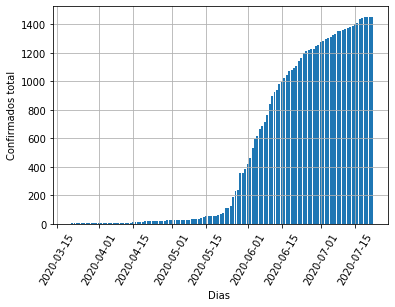

In [74]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,3].values)
plt.xlabel('Dias ')
plt.ylabel('Confirmados total')
plt.xticks(rotation=60)
plt.grid(True)

Grafico mortes totais:


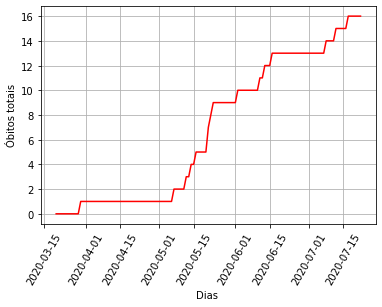

In [75]:
import matplotlib.pyplot as plt
plt.plot(tabela.iloc[:,0].values, tabela.iloc[:,4].values, color = "red")
plt.xlabel('Dias ')
plt.ylabel('Óbitos totais')
plt.xticks(rotation=60)
plt.grid(True)


Grafico confirmados diarios Micro OP:

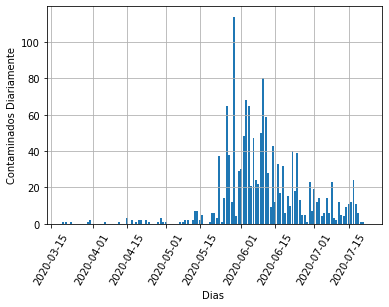

In [76]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,1].values)
plt.xlabel('Dias ')
plt.ylabel('Contaminados Diariamente')
plt.xticks(rotation=60)
plt.grid(True)

Grafico mortes diarias Micro OP:

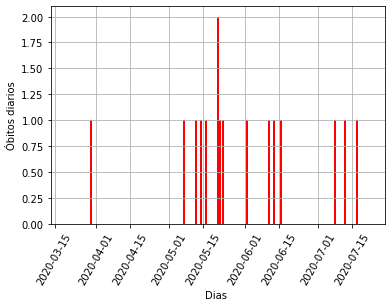

In [77]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,2].values, color = "red")
plt.xlabel('Dias ')
plt.ylabel('Óbitos diarios')
plt.xticks(rotation=60)
plt.grid(True)

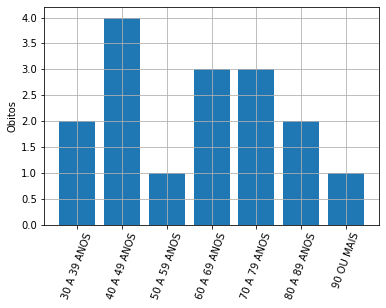

In [78]:
import matplotlib.pyplot as plt
plt.bar(grafico_faixa_etaria_mortos.iloc[:,0].values, grafico_faixa_etaria_mortos.iloc[:,1].values)
plt.ylabel('Obitos')
plt.xticks(np.arange(0, 7), rotation=70)
plt.grid(True)

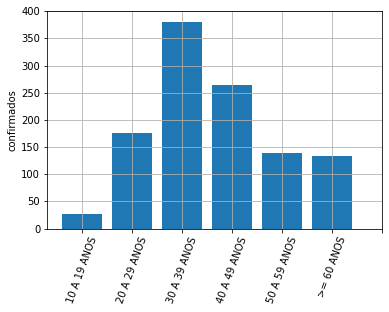

In [79]:
import matplotlib.pyplot as plt
plt.bar(grafico_faixa_etaria.iloc[:,0].values, grafico_faixa_etaria.iloc[:,1].values)
plt.ylabel('confirmados')
plt.xticks(np.arange(0, 7), rotation=70)
plt.grid(True)

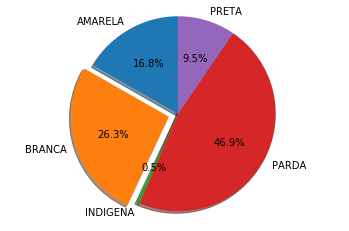

In [80]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AMARELA', 'BRANCA', 'INDIGENA', 'PARDA', 'PRETA'
sizes = raca['Quantidade']
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

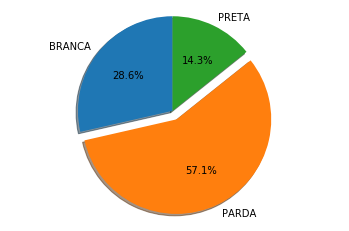

In [81]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'BRANCA', 'PARDA', 'PRETA'
sizes = raca_obitos['Quantidade']
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

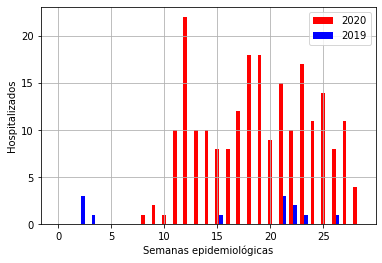

In [77]:
import numpy as np
import matplotlib.pyplot as plt

N = 29
hospitalizados_20 = X_20['Hospitalizados']
width = 0.35

ind = np.arange(N)  # the x locations for the groups

fig, ax = plt.subplots()
rects1 = ax.bar(ind, hospitalizados_20, width, color='r')

hospitalizados_19 = X_19['Hospitalizados']
rects2 = ax.bar(ind + width, hospitalizados_19, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Hospitalizados')
plt.xlabel('Semanas epidemiológicas')
plt.grid(True)

ax.legend((rects1[0], rects2[0]), ('2020', '2019'))

In [65]:
tabela.to_csv("tabela_micro_OP.csv", index = False)